In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def generate_synthetic_data():
    print("Generating synthetic energy data...")
    # Create date range for 6 months: Jan 2023 to June 2023
    date_rng = pd.date_range(start='1/1/2023', end='6/30/2023', freq='H')
    
    # Create DataFrame
    df = pd.DataFrame(date_rng, columns=['timestamp'])
    
    # Simulate device power consumption (Watts)
    
    # 1. Fridge: Cyclic pattern (Compressor On/Off) + Base load
    # Randomly switching between low (idle) and high (cooling) states
    df['fridge'] = np.random.randint(50, 200, size=(len(date_rng))) * np.random.choice([0, 1], size=len(date_rng), p=[0.3, 0.7])
    
    # 2. AC: Higher in summer (April-June), lower in winter (Jan-March)
    month = df['timestamp'].dt.month
    # Higher probability of AC being ON in months 4, 5, 6
    ac_prob = np.where(month >= 4, 0.8, 0.1) 
    df['ac'] = np.random.randint(1000, 2500, size=(len(date_rng))) * np.random.binomial(1, ac_prob)
    
    # 3. Lights: Higher usage at night (18:00 - 06:00)
    hour = df['timestamp'].dt.hour
    light_prob = np.where((hour >= 18) | (hour <= 6), 0.9, 0.1)
    df['lights'] = np.random.randint(20, 100, size=(len(date_rng))) * np.random.binomial(1, light_prob)
    
    # 4. Microwave: Random usage spikes
    df['microwave'] = np.random.randint(800, 1200, size=(len(date_rng))) * np.random.choice([0, 1], size=len(date_rng), p=[0.95, 0.05])
    
    # Total power consumption
    df['total_power'] = df['fridge'] + df['ac'] + df['lights'] + df['microwave']
    
    # Introduce some random missing values to practice cleaning
    # Set 0.5% of total_power to NaN
    mask = np.random.choice([True, False], size=len(df), p=[0.005, 0.995])
    df.loc[mask, 'total_power'] = np.nan
    
    return df

# Generate and save
df_raw = generate_synthetic_data()
print("Data Generated. Shape:", df_raw.shape)
df_raw.to_csv()


Generating synthetic energy data...
Data Generated. Shape: (4321, 6)


C:\Users\SRIDHAR RAO\AppData\Local\Temp\ipykernel_14876\2771334033.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_rng = pd.date_range(start='1/1/2023', end='6/30/2023', freq='H')


',timestamp,fridge,ac,lights,microwave,total_power\r\n0,2023-01-01 00:00:00,135,0,59,0,194.0\r\n1,2023-01-01 01:00:00,161,2182,98,0,2441.0\r\n2,2023-01-01 02:00:00,115,2072,31,0,2218.0\r\n3,2023-01-01 03:00:00,129,0,86,0,215.0\r\n4,2023-01-01 04:00:00,73,0,0,0,73.0\r\n5,2023-01-01 05:00:00,101,0,57,0,158.0\r\n6,2023-01-01 06:00:00,0,0,45,0,45.0\r\n7,2023-01-01 07:00:00,75,0,0,0,75.0\r\n8,2023-01-01 08:00:00,71,0,0,0,71.0\r\n9,2023-01-01 09:00:00,99,0,0,0,99.0\r\n10,2023-01-01 10:00:00,0,0,0,0,0.0\r\n11,2023-01-01 11:00:00,104,0,0,0,104.0\r\n12,2023-01-01 12:00:00,0,0,0,0,0.0\r\n13,2023-01-01 13:00:00,0,1890,0,0,1890.0\r\n14,2023-01-01 14:00:00,0,0,0,0,0.0\r\n15,2023-01-01 15:00:00,0,1033,0,0,1033.0\r\n16,2023-01-01 16:00:00,146,0,0,0,146.0\r\n17,2023-01-01 17:00:00,133,0,0,0,133.0\r\n18,2023-01-01 18:00:00,151,0,57,0,208.0\r\n19,2023-01-01 19:00:00,0,0,51,0,51.0\r\n20,2023-01-01 20:00:00,150,0,75,0,225.0\r\n21,2023-01-01 21:00:00,0,0,58,0,58.0\r\n22,2023-01-01 22:00:00,0,0,62,0,62.0\r\

In [2]:
df_raw.to_csv("Synthetic-Data",index=True)
df_raw.iloc[:30]
df_raw


,timestamp,fridge,ac,lights,microwave,total_power
0,2023-01-01 00:00:00,135,0,59,0,194.0
1,2023-01-01 01:00:00,161,2182,98,0,2441.0
2,2023-01-01 02:00:00,115,2072,31,0,2218.0
3,2023-01-01 03:00:00,129,0,86,0,215.0
4,2023-01-01 04:00:00,73,0,0,0,73.0
...,...,...,...,...,...,...
4316,2023-06-29 20:00:00,71,2286,68,0,2425.0
4317,2023-06-29 21:00:00,72,2172,55,0,2299.0
4318,2023-06-29 22:00:00,198,1495,30,0,1723.0
4319,2023-06-29 23:00:00,51,2463,32,0,2546.0


In [3]:
missing = df_raw.isnull().sum()
print("Missing Values per column:\n", missing)

Missing Values per column:
 timestamp       0
fridge          0
ac              0
lights          0
microwave       0
total_power    25
dtype: int64


In [4]:
df_raw[df_raw['total_power'].isna()].index

Index([ 126,  382,  515,  685, 1248, 1258, 1331, 1460, 1538, 1606, 1820, 2156,
       2265, 2522, 2604, 3159, 3237, 3298, 3415, 3556, 3770, 3810, 4121, 4236,
       4305],
      dtype='int64')

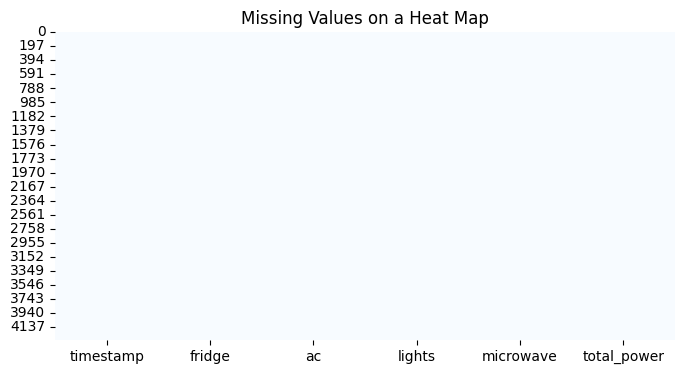

In [5]:
plt.figure(figsize=(8,4))
sns.heatmap(df_raw.isnull(),cbar=False,cmap='Blues')
plt.title("Missing Values on a Heat Map")
plt.show()

In [6]:
df_clean = df_raw.fillna(method='ffill')
df_clean.to_csv("Clean-Data",index = False)

C:\Users\SRIDHAR RAO\AppData\Local\Temp\ipykernel_14876\332814519.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean = df_raw.fillna(method='ffill')


In [7]:
df_clean[df_clean['total_power'].isna()].index

Index([], dtype='int64')

In [8]:
df_daily = df_clean.resample('D').mean()

df_weekly_sum = df_clean.resample('W').sum()

print("Daily resampled Shape", df_daily.shape)

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [13]:
df = pd.read_csv('Clean-Data')
df

,timestamp,fridge,ac,lights,microwave,total_power
0,2023-01-01 00:00:00,135,0,59,0,194.0
1,2023-01-01 01:00:00,161,2182,98,0,2441.0
2,2023-01-01 02:00:00,115,2072,31,0,2218.0
3,2023-01-01 03:00:00,129,0,86,0,215.0
4,2023-01-01 04:00:00,73,0,0,0,73.0
...,...,...,...,...,...,...
4316,2023-06-29 20:00:00,71,2286,68,0,2425.0
4317,2023-06-29 21:00:00,72,2172,55,0,2299.0
4318,2023-06-29 22:00:00,198,1495,30,0,1723.0
4319,2023-06-29 23:00:00,51,2463,32,0,2546.0


In [15]:
df['timestamp'] =  pd.to_datetime(df['timestamp'])
df['timestamp']

0      2023-01-01 00:00:00
1      2023-01-01 01:00:00
2      2023-01-01 02:00:00
3      2023-01-01 03:00:00
4      2023-01-01 04:00:00
               ...        
4316   2023-06-29 20:00:00
4317   2023-06-29 21:00:00
4318   2023-06-29 22:00:00
4319   2023-06-29 23:00:00
4320   2023-06-30 00:00:00
Name: timestamp, Length: 4321, dtype: datetime64[ns]

In [17]:
df.set_index('timestamp',inplace=True)

KeyError: "None of ['timestamp'] are in the columns"

In [18]:
df_daily = df.resample('D').mean()

df_weekly_sum = df.resample('W').sum()

# print("Daily resampled Shape", df_daily)
df_daily.to_csv('timed-data',index=True)
df_daily.head()



,fridge,ac,lights,microwave,total_power
timestamp,,,,,
2023-01-01,68.458333,299.041667,28.291667,0.000000,395.791667
2023-01-02,85.250000,166.083333,33.750000,88.000000,373.083333
2023-01-03,63.500000,221.333333,25.500000,0.000000,310.333333
2023-01-04,79.708333,77.083333,31.166667,168.416667,356.375000
2023-01-05,81.250000,460.666667,23.166667,129.291667,694.375000


In [19]:
df_weekly_sum = df.resample('W').sum()

df_weekly_sum

,fridge,ac,lights,microwave,total_power
timestamp,,,,,
2023-01-01,1643,7177,679,0,9499.0
2023-01-08,13955,43054,5145,13030,75194.0
2023-01-15,14323,33406,5355,11203,64287.0
2023-01-22,14768,46372,5055,5244,71559.0
2023-01-29,16246,36012,5257,7179,64378.0
2023-02-05,15055,19587,5674,8932,49248.0
2023-02-12,14069,34555,5975,7346,61945.0
2023-02-19,14422,26269,4872,9056,54619.0
2023-02-26,14215,49734,5474,3999,74963.0


In [ ]:
df
df_clean

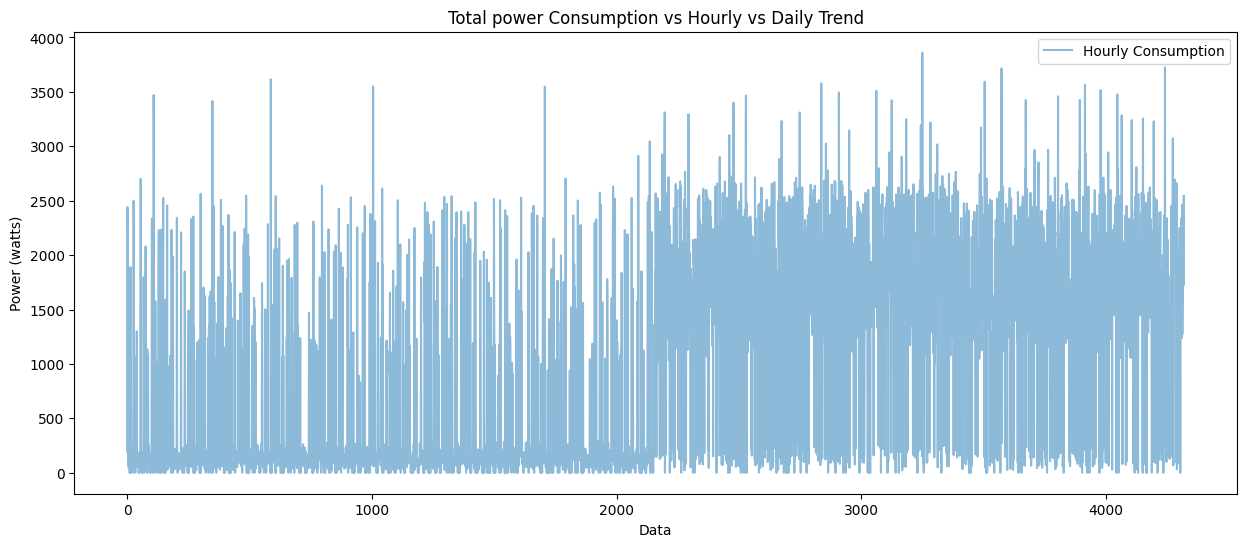

In [20]:
plt.figure(figsize=(15,6))
plt.plot(df_clean.index,df_clean['total_power'],label="Hourly Consumption", alpha = 0.5)
# plt.plot(df_clean.index,df_clean['total_power'],label="Daily Moving Average",color="red", alpha = 0.5)
plt.title("Total power Consumption vs Hourly vs Daily Trend")
plt.xlabel("Data")
plt.ylabel("Power (watts)")
plt.legend()
plt.show()

In [21]:
avg_consumption = df_clean[['fridge','ac','lights','microwave']].mean()
avg_consumption



fridge        86.849340
ac           806.429993
lights        31.644990
microwave     50.209905
dtype: float64

C:\Users\SRIDHAR RAO\AppData\Local\Temp\ipykernel_14876\145540252.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


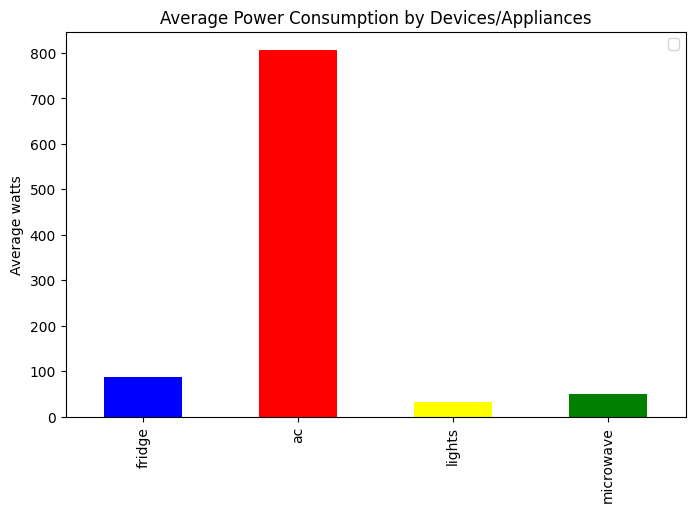

In [22]:
plt.figure(figsize = (8,5))
avg_consumption.plot(kind="bar",color = ['blue','red','yellow','green'])
plt.title("Average Power Consumption by Devices/Appliances")
plt.ylabel("Average watts")
plt.legend()
plt.show()

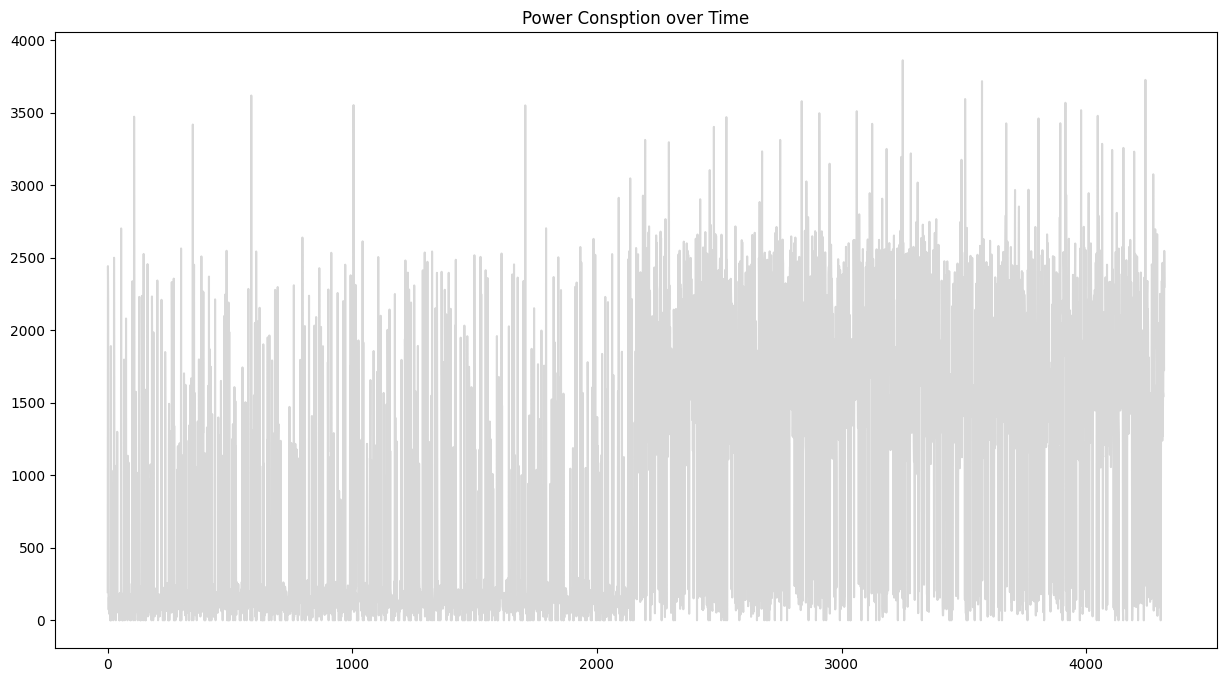

In [23]:
plt.figure(figsize=(15,8))
plt.plot(df_clean.index, df_clean['total_power'],alpha=0.3,color = "gray", label = "Power Consumption Hourly") 
plt.title("Power Consption over Time")
plt.show()

In [24]:
df_clean.columns

Index(['timestamp', 'fridge', 'ac', 'lights', 'microwave', 'total_power'], dtype='object')

In [25]:
df = pd.read_csv('HomeC.csv')
df

C:\Users\SRIDHAR RAO\AppData\Local\Temp\ipykernel_14876\1728068120.py:1: DtypeWarning: Columns (0,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('HomeC.csv')


,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503906,1452128306,1.599333,0.003233,1.599333,0.000050,0.104017,0.625033,0.041750,0.005233,0.008433,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503907,1452128307,1.924267,0.003217,1.924267,0.000033,0.422383,0.637733,0.042033,0.004983,0.008467,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503908,1452128308,1.978200,0.003217,1.978200,0.000050,0.495667,0.620367,0.042100,0.005333,0.008233,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503909,1452128309,1.990950,0.003233,1.990950,0.000050,0.494700,0.634133,0.042100,0.004917,0.008133,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51


In [28]:
df.columns = [col.replace('[kW]', '').strip() for col in df.columns]
print("CLeaned Column Names: ", df.columns.tolist())
df.columns


CLeaned Column Names:  ['time', 'use', 'gen', 'House overall', 'Dishwasher', 'Furnace 1', 'Furnace 2', 'Home office', 'Fridge', 'Wine cellar', 'Garage door', 'Kitchen 12', 'Kitchen 14', 'Kitchen 38', 'Barn', 'Well', 'Microwave', 'Living room', 'Solar', 'temperature', 'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability']


Index(['time', 'use', 'gen', 'House overall', 'Dishwasher', 'Furnace 1',
       'Furnace 2', 'Home office', 'Fridge', 'Wine cellar', 'Garage door',
       'Kitchen 12', 'Kitchen 14', 'Kitchen 38', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'temperature', 'icon', 'humidity', 'visibility',
       'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability'],
      dtype='object')

In [31]:
kitchen_cols = ['Dishwasher','Microwave','Fridge','Kitchen 12 [kW]','Kitchen 14 [kW]','Kitchen 38 [kW]']
available_cols = [c for c in kitchen_cols if c in df.columns]
df_kitchen = df[available_cols]
df_kitchen.sum()
df_kitchen
df_kitchen.notnull()






,Dishwasher,Microwave,Fridge
0,True,True,True
1,True,True,True
2,True,True,True
3,True,True,True
4,True,True,True
...,...,...,...
503906,True,True,True
503907,True,True,True
503908,True,True,True
503909,True,True,True


In [37]:
df['Total_Kitchen_Power'] = df[available_cols].sum(axis=1)

df['High_Useage'] = df['Total_Kitchen_Power'] <1.0
df[['Total_Kitchen_Power','High_Useage']].sample(50)

,Total_Kitchen_Power,High_Useage
58032,0.008917,True
210142,0.009100,True
8013,0.135350,True
391725,0.139233,True
183519,0.129083,True
278632,0.009167,True
206065,0.009350,True
361756,0.009567,True
249103,0.009383,True
134128,0.009167,True


In [62]:
# Convert time column to datetime, coercing errors to handle mixed formats
df['time'] = pd.to_datetime(df['time'], errors='coerce')
df['time']

0        1970-01-01 00:00:01.451624400
1        1970-01-01 00:00:01.451624401
2        1970-01-01 00:00:01.451624402
3        1970-01-01 00:00:01.451624403
4        1970-01-01 00:00:01.451624404
                      ...             
503906                             NaT
503907                             NaT
503908                             NaT
503909                             NaT
503910                             NaT
Name: time, Length: 503911, dtype: datetime64[ns]

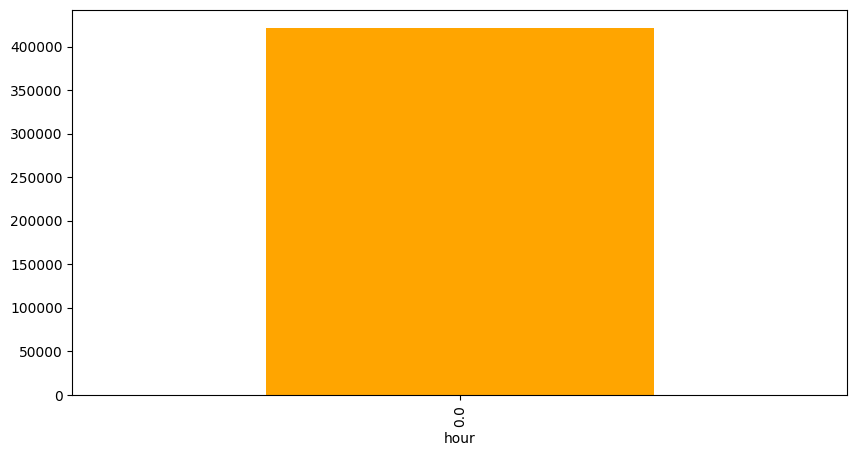

In [65]:
# Create hour column from time
df['hour'] = df['time'].dt.hour

# Calculate hourly mean of use
hourly_status = df.groupby('hour')['use'].sum()

plt.figure(figsize = (10,5))
hourly_status.plot(kind = 'bar', color='orange')
plt.show()